# **Report on Analysis of Diabetes Data** ❤️‍🩹🩺

In [ ]:
import numpy as np
import pandas as pd

✅ Loading diabetes dataset and previewing it, as well as loading information about columns , missing data, and data types

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


✅ Let's start from checking the blood glucose level of diabetic patient

In [ ]:
diabetes['Glucose'][diabetes['Outcome']==1].mode()

0    125
Name: Glucose, dtype: int64

🔎 As we can see 125 is frequent blood glucose level for diabetic patient.

In [ ]:
diabetes['Glucose'][diabetes['Outcome']==1].mean()

141.25746268656715

In [ ]:
diabetes['Glucose'][diabetes['Outcome']==1].median()

140.0

✅ From above we can see that mean and median not much differ so it is normaly distributed
we can assume that average blood glucose level of diabetic patient is near 140

✅ Lets now find which age group has more diabetic patients

In [ ]:
bin_size = 10  # Specify the size of each interval
min_age = diabetes['Age'].min()  # Minimum age in the dataset
max_age = diabetes['Age'].max()  # Maximum age in the dataset
bins = list(range(min_age, max_age + bin_size, bin_size))
labels = [f"{i}-{i+bin_size-1}" for i in range(min_age, max_age, bin_size)]
diabetes['Age_group'] = pd.cut(diabetes['Age'], bins=bins, labels=labels, include_lowest=True)

#printing min_age and max_age
print('Age is defined from')
print(min_age, ' to ', max_age)

Age is defined from
21  to  81


<Axes: ylabel='Age'>

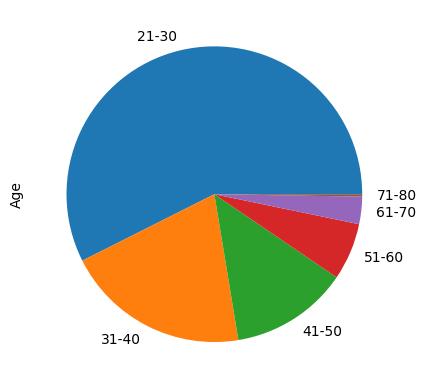

In [ ]:
diabetes.groupby('Age_group', observed=False)['Age'].count().plot(kind='pie')

✅ From above we can see that age 21 to 35 has more records and data is not evenly distributed

<Axes: xlabel='Age_group'>

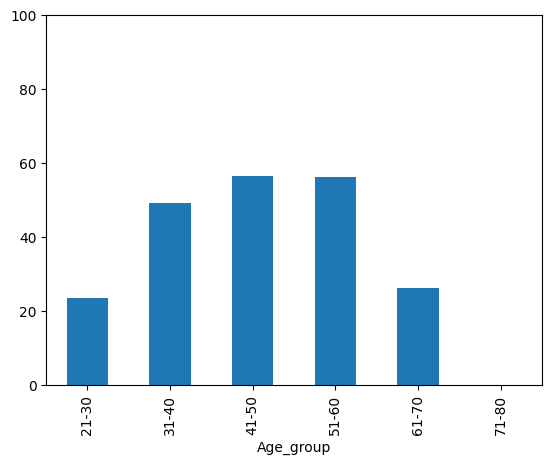

In [ ]:
age_chart = diabetes.groupby('Age_group', observed=False)['Outcome'].mean() * 100
age_chart.plot(kind='bar', ylim = (0, 100))

✅ From above we can see that from age 41 to 50 has more diabetic patients nearly equivalent is age group 51 to 60
then followed by 31 to 40 and 61 to 70, so middle age people has less chance of getting diabetes

✅ Now let's find Preganancies week have any relation to diabetes

In [ ]:
bin_size = 4  # Specify the size of each interval
min_pre = diabetes['Pregnancies'].min()  # Minimum pregnecies in the dataset
max_pre = diabetes['Pregnancies'].max()  # Maximum pregnecies in the dataset
bins = list(range(min_pre, max_pre + bin_size, bin_size))
labels = [f"{i}-{i+bin_size-1}" for i in range(min_pre, max_pre, bin_size)]
diabetes['Pregnancy_group'] = pd.cut(diabetes['Pregnancies'], bins=bins, labels=labels, include_lowest=True)

#printing min pregnacies and pregnancies
print('Pregnancies week is defined from')
print(min_pre, ' to ', max_pre)

Pregnancies is defined from
0  to  17


<Axes: xlabel='Pregnancy_group'>

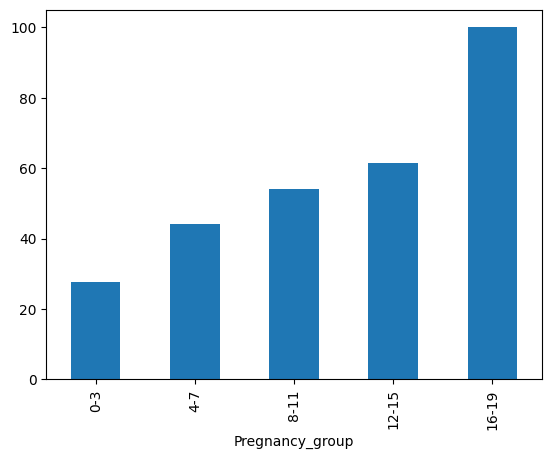

In [ ]:
Pregnancies_chart = diabetes.groupby('Pregnancy_group', observed=False)['Outcome'].mean() * 100
Pregnancies_chart.plot(kind='bar')

✅ Here we can clearly see that more pregnancies week prone to gestational  diabetes

✅ Now If person have less Insulin does realy get diabetes let's check.

In [ ]:
bin_size = 50  # Specify the size of each interval
min_ins = diabetes['Insulin'].min()  # Minimum insulin level in the dataset
max_ins = diabetes['Insulin'].max()  # Maximum insulin level in the dataset
bins = list(range(min_ins, max_ins + bin_size, bin_size))
labels = [f"{i}-{i+bin_size-1}" for i in range(min_ins, max_ins, bin_size)]
diabetes['Insulin_group'] = pd.cut(diabetes['Insulin'], bins=bins, labels=labels, include_lowest=True)

#printing min insulin level and max insulin level
print('Insulin level is defined from')
print(min_ins, ' to ', max_ins)

Insulin level is defined from
0  to  846


<Axes: xlabel='Insulin_group'>

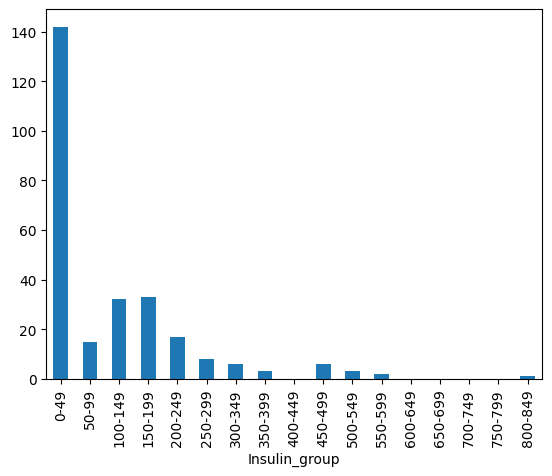

In [ ]:
Insulin_chart = diabetes.groupby('Insulin_group', observed=False)['Outcome'].sum()
Insulin_chart.plot(kind='bar')

✅ From above it is clear that person having high insulin will have low chances of getting diabetes

# Conclusion

We have found out that age is related to diabetes as well as pregnacies, found relation between insulin level and diabbetes, their glucose level etc.